### Classification Tree
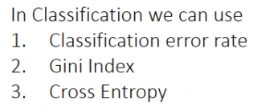
> if Gini Index is Small i.e; zero it is node purity is high.
>- Cross Entropy is also used to know node purity

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('Movie_Classification.csv')

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

#### Missing value imputation

In [5]:
df.Time_taken.mean()

157.39149797570855

In [6]:
df['Time_taken'].fillna(value=df.Time_taken.mean(),inplace=True)

In [7]:
df.isna().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Start_Tech_Oscar       0
dtype: int64

### Dummy Variable creation

In [8]:
df=pd.get_dummies(df,columns=['3D_available','Genre'],drop_first=True)
df.describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,...,157.391498,260.832095,39.181818,545.043478,45057.707510,0.545455,0.551383,0.306324,0.191700,0.361660
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,...,30.921101,104.779133,12.513697,106.332889,18364.351764,0.498422,0.497845,0.461422,0.394028,0.480957
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,...,0.000000,201.152000,3.000000,333.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,...,132.690000,223.796000,28.000000,465.000000,34050.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,...,158.980000,254.400000,39.000000,535.500000,42400.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,...,181.520000,283.416000,50.000000,614.750000,50000.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,...,217.520000,2022.400000,60.000000,868.000000,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### x-y splitting of the variables.

In [9]:
x=df.loc[:,df.columns!='Start_Tech_Oscar']

In [10]:
y=df['Start_Tech_Oscar']

#### Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#### Training Classification Tree

In [12]:
from sklearn import tree

In [13]:
clf_tree=tree.DecisionTreeClassifier(max_depth=3)

In [14]:
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [15]:
y_train_pred=clf_tree.predict(x_train)

In [16]:
y_test_pred=clf_tree.predict(x_test)

### Model performance

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [18]:
accuracy_score(y_train,y_train_pred)

0.6534653465346535

In [19]:
confusion_matrix(y_test,y_test_pred)

array([[39,  5],
       [41, 17]], dtype=int64)

In [20]:
accuracy_score(y_test,y_test_pred)

0.5490196078431373

### Plotting Decision Tree

In [21]:
dot_data=tree.export_graphviz(clf_tree,out_file=None,feature_names=x_train.columns,filled=True)

In [22]:
import graphviz

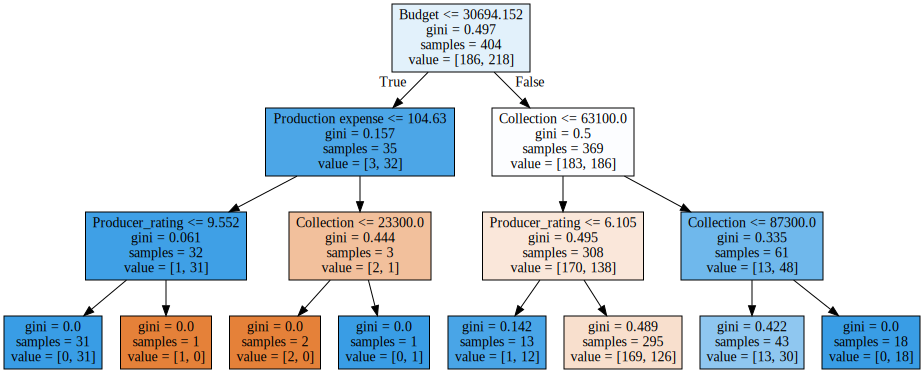

In [23]:
graphviz.Source(dot_data)

>- Blue color in Decision tree represent High node purity for 1
>- Orange colored blocks represent High node purity for 0

## Controlling tree growth

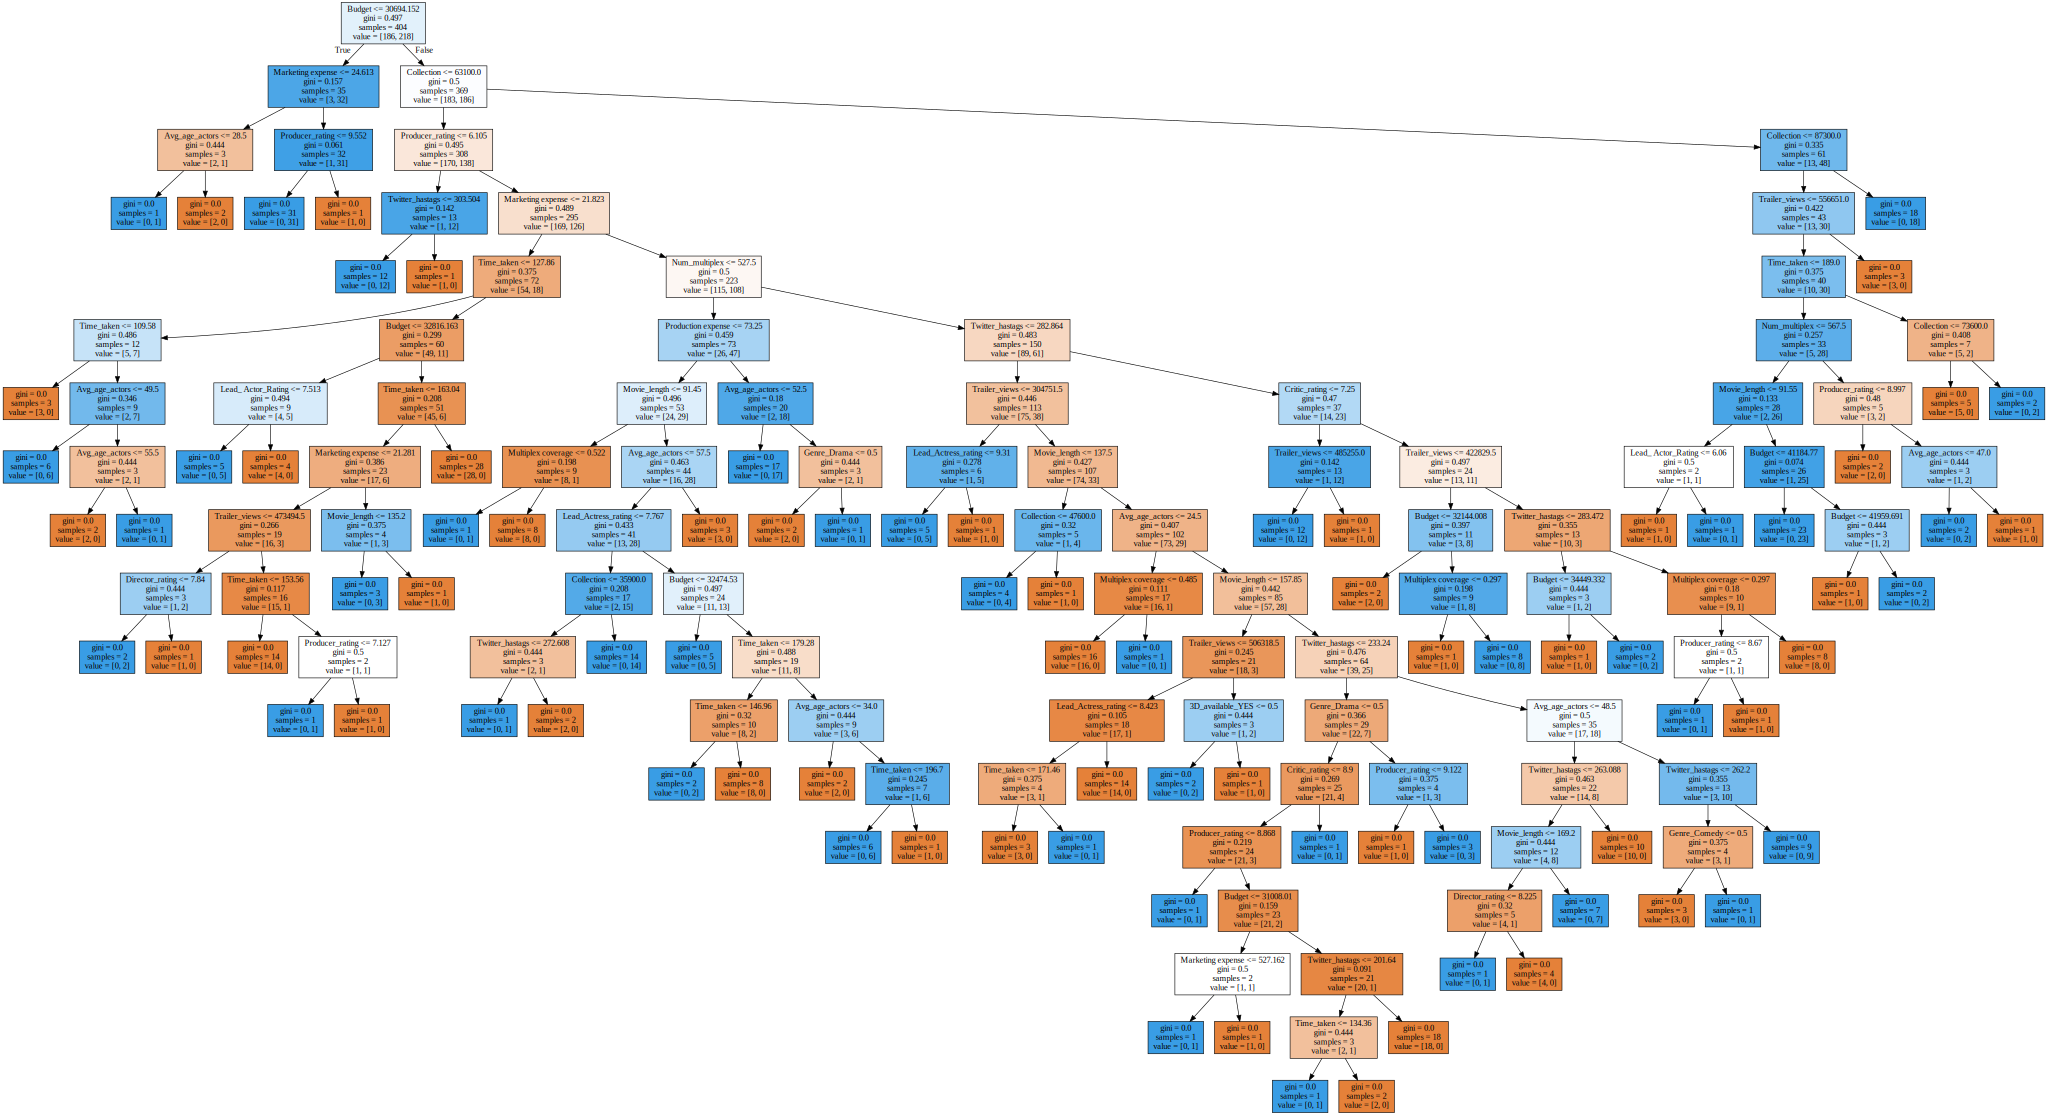

In [24]:
clf_tree1=tree.DecisionTreeClassifier(splitter='best')
clf_tree1.fit(x_train,y_train)
dot_data1=tree.export_graphviz(clf_tree1,out_file=None,feature_names=x_train.columns,filled=True)
graphviz.Source(dot_data1)

In [25]:
accuracy_score(y_test,clf_tree1.predict(x_test))

0.5882352941176471

>- Giving the splitter parameter as best we can get the best accuracy for the model appled.

> 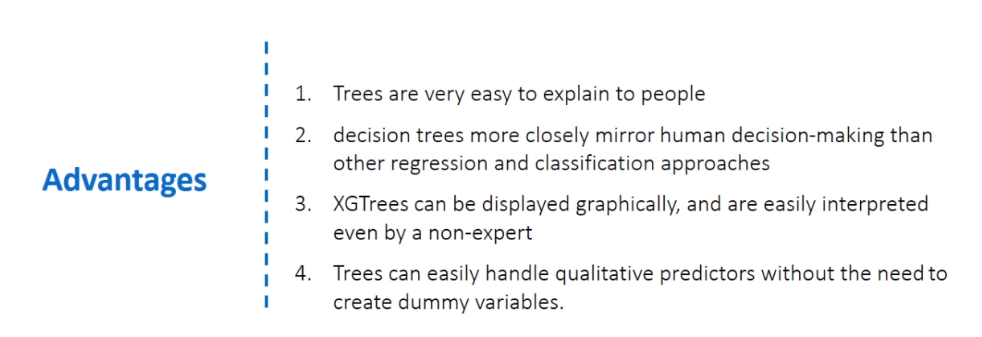
> 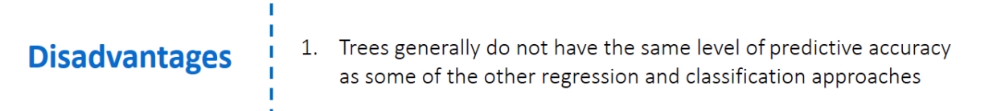

### Ensemble methods 

>-Bagging method

In [26]:
clf_tree1=tree.DecisionTreeClassifier()

In [27]:
from sklearn.ensemble import BaggingClassifier

In [28]:
bag_clf=BaggingClassifier(base_estimator=clf_tree1,n_estimators=1000,
                         bootstrap=True,n_jobs=-1,
                         random_state=42)

In [29]:
bag_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [30]:
confusion_matrix(y_test,bag_clf.predict(x_test))

array([[27, 17],
       [22, 36]], dtype=int64)

In [31]:
accuracy_score(y_test,bag_clf.predict(x_test))

0.6176470588235294

> with bagging we improved accuracy score of the model
>- Disadvantage can be Bagging Creates Correlated Trees

### RandomForest Method
##### We use subsets of predictors so it can form less correlated trees. so that we get different splits in each model.
>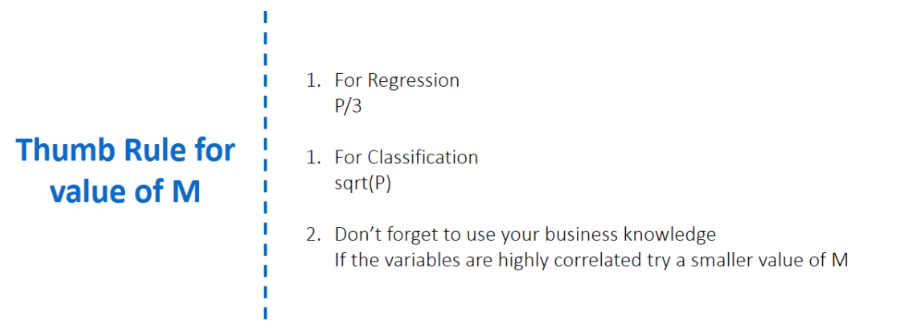

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_clf=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

In [34]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [35]:
confusion_matrix(y_test,rf_clf.predict(x_test))

array([[25, 19],
       [18, 40]], dtype=int64)

In [36]:
accuracy_score(y_test,rf_clf.predict(x_test))

0.6372549019607843

### Grid Search

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
rf_clf1=RandomForestClassifier(n_estimators=250,random_state=42)

In [39]:
params_grid={'max_features':np.arange(4,10),
            'min_samples_split':[2,3,10]}

In [40]:
grid_search=GridSearchCV(rf_clf1,params_grid,
                        n_jobs=-1,cv=5,scoring='accuracy')   ## CV: Cross Validation

In [41]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': array([4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [42]:
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 3}

In [43]:
cvrf_clf=grid_search.best_estimator_

In [44]:
accuracy_score(y_test,cvrf_clf.predict(x_test))

0.6274509803921569

### Boosting Techniques
>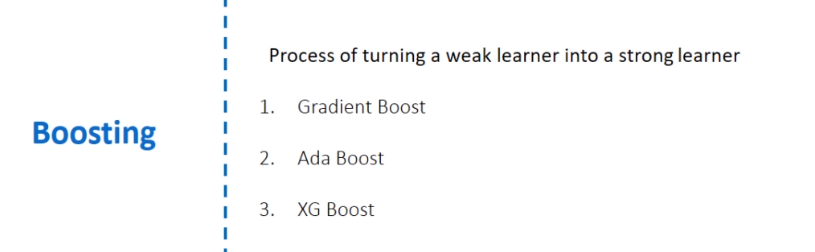

#### Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [47]:
accuracy_score(y_test,gbc.predict(x_test)) # using default hyper parameters.

0.5784313725490197

In [48]:
gbc1=GradientBoostingClassifier(learning_rate=0.02,n_estimators=1000,max_depth=1)

In [49]:
gbc1.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [50]:
accuracy_score(y_test,gbc1.predict(x_test))

0.6176470588235294

### ADABOOST model

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
ada=AdaBoostClassifier(learning_rate=0.02,n_estimators=5000)

In [53]:
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [54]:
accuracy_score(y_test,ada.predict(x_test))

0.6274509803921569

In [55]:
ada1=AdaBoostClassifier(rf_clf,learning_rate=0.06,n_estimators=5000) #applying to before defined random forest

In [56]:
ada1.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000,
                                                         n_jobs=-1,
                                                         random_state=42),
                   learning_rate=0.06, n_estimators=5000)

In [57]:
accuracy_score(y_test,ada1.predict(x_test))

0.6274509803921569

### XG BOOST model

In [58]:
!pip install xgboost --q
import xgboost as xgb

#### Prameter Tuning

1. General Parameters: Guide the overall functioning
2. Booster Parameters: Guide the individual booster (tree/regression) at each step
3. Learning Task Parameters: Guide the optimization performed

In [59]:
xgb_clf=xgb.XGBClassifier(max_depth=5,n_estimators=10000,
                         n_jobs=-1,learning_rate=0.3)

In [60]:
xgb_clf.fit(x_train,y_train)

C:\Users\Allam\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [61]:
accuracy_score(y_test,xgb_clf.predict(x_test))

0.6666666666666666

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

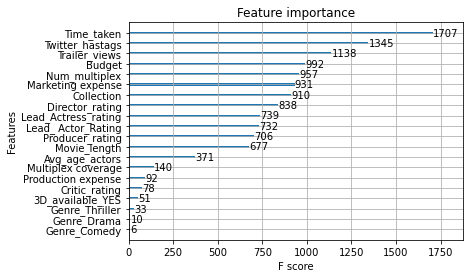

In [62]:
xgb.plot_importance(xgb_clf)

In [83]:
#using grid search
param_tests={'max_depth':range(3,10,2),
            'gamma':[0.1,0.2,0.3],
            'subsample':[0.8,0.9],
            'colsample_bytree':[0.8,0.9],
            'reg_alpha':[0.01,0.1,1]}
xgb_clf1=xgb.XGBClassifier(n_estimators=500,
                         learning_rate=0.3)

In [84]:
grid_search_xgb=GridSearchCV(xgb_clf1,param_tests,n_jobs=-1,cv=5,scoring='accuracy')

In [85]:
grid_search_xgb.fit(x_train,y_train)

C:\Users\Allam\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:02:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [86]:
grid_search_xgb.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.2,
 'max_depth': 3,
 'reg_alpha': 1,
 'subsample': 0.9}

In [87]:
cvxg_clf=grid_search_xgb.best_estimator_

In [88]:
accuracy_score(y_test,cvxg_clf.predict(x_test))

0.6666666666666666